# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.149339e+01     7.306112e+00
 * time: 0.0050771236419677734
     1     3.006105e+01     6.442030e+00
 * time: 0.015398979187011719
     2     2.946768e+01     1.276059e+01
 * time: 0.04071402549743652
     3     1.623761e+01     4.027768e+00
 * time: 0.06831192970275879
     4     1.332441e+01     1.825626e+00
 * time: 0.09055590629577637
     5     1.200593e+01     1.257706e+00
 * time: 0.1126260757446289
     6     1.162797e+01     3.151544e+00
 * time: 0.1305069923400879
     7     1.075458e+01     1.417140e+00
 * time: 0.14824199676513672
     8     1.032043e+01     1.288905e+00
 * time: 0.16621899604797363
     9     9.802972e+00     8.938582e-01
 * time: 0.18401813507080078
    10     9.633108e+00     9.040255e-01
 * time: 0.20198392868041992
    11     9.481867e+00     8.177427e-01
 * time: 0.2198779582977295
    12     9.429082e+00     1.124467e+00
 * time: 0.23411297798156738
    13     9.351021e+00     5.712964e-01
 * time:

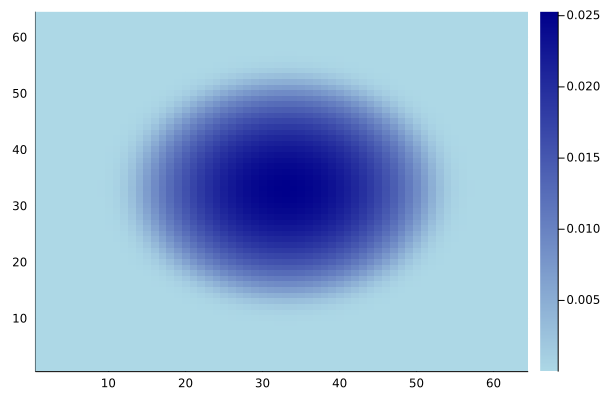

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)